# Lab 1: Introduction to Digital Trace Data

Welcome to the first lab. The labs will help you solidify the concepts you've learned in the lectures, analyze digital trace data, and think about the opportunities and challenges associated with digital trace data.

So stay tuned if you are interested in, for example, what data is collected when using platforms like ChatGPT, how to retrieve and analyze TikTok or Instagram data, and what we can learn about society from Whatsapp data.

The labs will be written in Python (but don't worry, we __not__ expect you to know or learn Python) and published as .ipynb files (Jupyter notebooks) that you can easily open via Google Colab.

These files consist of multiple cells containing text or code. You can edit an existing cell by double-clicking it. You can insert text by clicking the "+ Text" button in the top left corner and add code by clicking the "+ Code" button. To add your answers, simply double-click on the cell that says "*ADD YOUR ANSWERS HERE*".

FIRST STEP OF ALL PRACTICALS: Click on File -> Save a copy in Drive. Work on that file!.

You will need to submit the labs as a PDF by 17:00 the following Monday. This can be done directly from Colab (File -> Print --> PDF), or you can copy the answers into a Word document and export it as a PDF.

## Part 1: Request a data download package (DDP) from a social media, you will use it in the next lab.

Next week you will work with your own DDP. To prepare for it, please request the DDP of chatGPT, Youtube, or Instagram.
- Youtube (Google): https://support.google.com/accounts/answer/3024190?hl=en
- chatGPT: https://help.openai.com/en/articles/7260999-how-do-i-export-my-chatgpt-history-and-data
- Instagram: https://accountscenter.instagram.com/info_and_permissions/

Your request will take some hours/days to be processed. Once it's available you will be able to download a ZIP file. Please do so before the second lab.

---

## Part 2. Type of file formats

You have likely encountered that data can be stored in many different type of file formats. These are some of the most common ways to store DTD:

- HTML (HyperText Markup Language) and CSS (Cascading Style Sheets): HTML is like the skeleton of a website, and CSS is what makes it pretty by adding styles and colors.

- XML (eXtensible Markup Language): A format to communicate data. It allows different programs talk to each other by sharing data in a way they all understand.

- JSON (JavaScript Object Notation: This is a simple way to keep info that both humans and computers can easily read.

- Spreadsheets (e.g. Excel files, CSV or TSV). CSV or TSV are basic spreadsheets stored in a plain text file. Each line is a row, and values in each row are separated by commas (CSV) or tabs (TSV). It's simple and works well for lists of things like names or numbers.

- PDF (Portable Document Format).

- Databases: Different types of databases can keep different types of information. They have some perks, like you can retrieve and write data continiously and easily.

- Geographical information: e.g. .geojson

- Multimedia: Images (png/jpg/gif), Video (e.g. mp4), Audio (e.g. mp3)



In general, we divide data into structured and unstructured data. Structured data is often stored in spreadsheets (or databases) and is easier to analyze. Unstructured data is more diverse, can be stored using many different file formats, and is harder to analyze.

![https://www.youtube.com/watch?app=desktop&v=sf2S6ZI9BD0](https://digitaltracedata.github.io/materials/lab1/stru_unstr.png)

### 2.1 You can find a simple example of an HTML file [here](https://gist.githubusercontent.com/thatisuday/be3e05400fed2c0749a8818e0f44f57a/raw/91a25f3ed09e1df8160183a489b9b1db53269758/index.html). Note that it is a tree structure, where sections are delimited between `<TAG>` and `</TAG>`.

- What are the two main parts within the HTLM file?
- What does `<div>`, `<h1>` and `<p>` signal?
- What does the line `<link rel="stylesheet" href="./style.css"/>` do?
- What does the line `<script src="./main.js"></script>` do?



*ANSWERS*

- Head and Body: Head contains some meta information, body contains the content
- `<div>` groups elements together ; `<h1>` a top-level header (largest); `<p>` signals a paragraph
- It links the HTML file to the file style.css which applies styles to the html
- It adds the JavaScript `file main.js` in the HTML 

### 2.2 Through [this link](https://gist.githubusercontent.com/13protons/3441183/raw/68ac9a15d84e1cfaa313c8b59e4bcc16bfae842d/XML%2520Example) you can find an example of a simple XML file. What do you notice when comparing it to the HTML file above?

*ANSWERS*

Very similar structure, with tags (<> and </>), but tags are more flexible (are not predefined like in HTML). E.g. here, <quiz> and <question> are used as tags which wouldn't work in HTML.

### 2.3 Open [this geojson file](https://raw.githubusercontent.com/blackmad/neighborhoods/master/utrecht.geojson). By clicking on the link it will open on the browser.
- Briefly skim its structure. What data does it contain?
- Download the file to your computer (Ctrl/Cmd + S). Then go to [geojson.io](https://geojson.io) and upload the geojson file you just downloaded by clicking on "Open". What data is encoded in the file?


*ANSWERS*

General: 4 main sections - type, features, geometry and properties
Here: Contains information about the coordinates of the different districts in the City of Utrecht. Provides an id for every district and information about date/time of creation and last update.

### 2.4 Below we read in two data sets in the JSON format and briefly inspect their structure. One dataset contains information about [COVID-19 infections](https://raw.githubusercontent.com/Rajesh42/Covid-19/master/data.json), the other one stores various [recipes](https://raw.githubusercontent.com/tabatkins/recipe-db/master/db-recipes.json). Click both files' links to observe the structure of the JSON files and run the code below. How is the information structured in them? What is similar in both files and in what sense do they differ?

*ANSWER*

The COVID data set contains a list of different regions and provides information geographical information in addition to epidemiological data. It is structured as a list of which each element contains 11 key-value pairs.

The recipes also contain key-value pairs with information about nutritional values and the recipe and ingredients.

The structure of both is quite similar, as they both include a list of elements with key-value pairs, they differ a bit in the sense that in the recipes every element of the list has an extra key (i.e., an id of the recipe like "2", "4", etc.).



Now we can read in the data:

In [ ]:
import requests

# COVID-19 data
url_covid = "https://raw.githubusercontent.com/Rajesh42/Covid-19/master/data.json"
response_covid = requests.get(url_covid)
data_covid = response_covid.json()

# Recipes data
url_recipes = "https://raw.githubusercontent.com/tabatkins/recipe-db/master/db-recipes.json"
response_recipes = requests.get(url_recipes)
data_recipes = response_recipes.json()

Print these files:

In [ ]:
print(data_covid)
print(data_recipes)

And access certain values stored in them:

In [ ]:
print(data_covid['data'][0]['name'], data_covid['data'][0]['country'])  # Print the region and country of the first entry

# For the recipes we could for example be interested in the name of the recipe
print(data_recipes['2']['name'], data_recipes['2']['calories'])  # from the structure we can see that the first recipe can be retrieved with '2'

If we want to do something a bit more advanced, we could retrieve all the recipes' calories and plot them:

In [ ]:
import matplotlib.pyplot as plt

calories = [recipe['calories'] for recipe in data_recipes.values() if 'calories' in recipe]

plt.hist(calories, bins=50)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories in Recipes')
plt.show()


### 2.5 Now look at [this csv file](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv) containing data about the passengers on the titanic. Explain how the information is structured.

*ANSWER*

- Columns for the variables PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
- Rows for the different passengers
- Values separated by commas

### 2.6 Which of the file formats that you just explored above represent structured and unstructured data?

*ANSWER*

- Structured: JSON, GeoJSON, CSV
- Unstructured/Semistructured: XML, HTML

---

## Part 3: How is digital trace data different from data you have worked before?


_Just as the invention of the telescope revolutionized the study of the heavens, so too by rendering the unmeasurable measurable, the technological revolution in mobile, Web, and Internet communications has the potential to revolutionize our understanding of ourselves and how we interact…. Three hundred years after Alexander Pope argued that the proper study of mankind should lie not in the heavens but in ourselves, we have finally found our telescope. Let the revolution begin._



Watts DJ. 2011. Everything Is Obvious: How Common Sense Fails Us. New York: Crown Business


### 3.1 Download the data from [this](https://digitaltracedata.github.io/materials/lab1/ddp_twitter_soda.zip) link and open it in your computer.

Today you are going to be working with a non-personal account from Twitter.

This the digital trace data corresponding to the ODISSEI Social Data Science Twitter account. We removed some files with sensitive information (private messages, authentification keys). We barely use the account, so most of the files are empty.



### 3.2 Explore manually the files in the DDP. The Twitter data is stored in the `data` folder. The `assets` folder provides some formatting to the file `Your archive.html`. Let's use only the `data` folder.
- How many folders/files does the DDP have? (roughly)
- What is the format of the files included?
- Which one is the largest file?



*ANSWERS*

- 89 objects in folder
- files are in .js format
- largest file is `ad-engagements.js`

### 3.3 Open the file `data/README.txt` in a file editor and take a quick look. - How is Twitter recommending you to explore the DDP?
- In what file format is the majority of the data stored?
- The README provides explanations on each file. What is stored in the files `ad-engagements.js`, `personalization.js` and `tweets.js`
- Open those files in your computer, write something you learned about the twitter account (ODISSEI_SoDa) by looking at those files.


*ANSWERS*

They recommend to open the Your archive.html file in the main folder to navigate the archive in case the archive is less than 50GB.

### 3.4 Now open the file `Your archive.html` in your browser and explore the data by clicking on the different menu options in the left.
- What type of data is generated by the user?
- What type of data is generated by Twitter automatically?

*ANSWERS*

Generated by user: Tweets, Likes, DMs, Muted and Blocked Accounts, Some Demographics

Generated by twitter: metadata of tweets, interests, ads

### 3.5 Can you identify other people in the data?

*ANSWERS*

Yes, users who were mentioned/tagged, retweeted, liked.

### 3.6 Imagine you would be able to collect the DDP of thousands of students at Utrecht University. Come up with a research question that could be answered with such data.

*ANSWERS*

E.g. How does students' sentiment about academic content change throughout the year? How do students interact with academic content? How are students connected on Twitter?.... 



## Part 4: Typical data processing workflow

You have seen in the previous exercises that most DTD is unstructured. In the following sections, we guide you through a typical data processing workflow (in Python).

The workflow takes the `tweets.js` file, and analyzes the relationships between the precesnce of media (images/videos) in a tweet, and the likelihood that the tweet is retweeted or liked.

### 4.1 Data download

The first step is to download the data (the `tweets.js` file), and read the JSON file as a dictionary in Python.

When was the second tweet created? (check the output of the code)

*ANSWERS*

Fri Feb 09 10:09:41 +0000 2024

In [ ]:
import json
import pandas as pd
import gdown

# URL where the file is located (feel free to open it in the broswer too)
download_url = "https://digitaltracedata.github.io/materials/lab1/tweets.js"

# Download the file using the google download library
output_file = "tweets.js"  # specify the desired output file name
gdown.download(download_url, output_file, quiet=False)


def read_twitter_json(file_name):
    """
    Read JSON file and returns a json object
    Adapted from: https://github.com/vrruiz/tweet-js/blob/master/tweet-js.py
    """

    # Read the file
    with open(file_name, "r") as tweets_file:
        tweets_lines = tweets_file.readlines()
    # Replace header
    tweets_lines[0] = tweets_lines[0].replace('window.YTD.tweets.part0 = ', '')
    # Convert list back to text
    tweets_data = ''.join(tweets_lines)
    # Parse JSON twitter data
    tweets_js = json.loads(tweets_data)

    return tweets_js

tweets = read_twitter_json(output_file)

# Print the second tweet
tweets[1]

In [3]:
# Find how many times the second tweet was favorited
tweets[1]["tweet"]["favorite_count"]

'5'

### 4.2 Converting data to a spreadsheet

Most of the analysis tools available require spreadsheets (tables). We will convert our tweet data (unstructured) to a spreadsheet (structured).

The rows will be the tweets, and the columns the time when the tweet was posted, the text of the tweet, and the number of retweets and likes.

In [5]:
def extract_info(tweet):
    # Count if we linked to a url
    url_count = len(tweet["entities"]["urls"]) > 0

    # Do we share a photo
    media_ = "media" in tweet["entities"]

    data_save = [url_count, media_]

    # Other info
    return [url_count, media_, tweet.get("retweet_count"), tweet.get("favorite_count"), tweet.get("full_text"), tweet.get("created_at")]

def create_table(tweets):
    all_info = []
    for tweet in tweets:
        tweet_info = extract_info(tweet["tweet"])
        all_info.append(tweet_info)

    # Conver to table
    df = pd.DataFrame(all_info, columns=["has_url", "has_media", "rt_count", "like_count", "text", "time"])
    df["rt_count"] = df["rt_count"].astype(float)
    df["like_count"] = df["like_count"].astype(float)
    df["time"] = pd.to_datetime(df["time"])
    df["hour_day"] = df["time"].dt.hour + df["time"].dt.minute/60

    return df


df = create_table(tweets)
df.head()

/var/folders/zh/2r47y8wn6tn1q3s58d9_t7fw0000gn/T/ipykernel_72941/439783068.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


,has_url,has_media,rt_count,like_count,text,time,hour_day
0,True,False,0.0,0.0,The dashboard is based on earlier work by the ...,2024-02-09 10:09:42+00:00,10.150000
1,True,True,2.0,5.0,✨ We have a shiny new FAIR projects dashboard!...,2024-02-09 10:09:41+00:00,10.150000
2,False,False,0.0,0.0,RT @ODISSEI_nl: What's more: in this programme...,2024-01-23 14:50:01+00:00,14.833333
3,False,False,0.0,0.0,RT @ODISSEI_nl: 🥁The applications for SICSS-OD...,2024-01-23 14:49:52+00:00,14.816667
4,False,False,0.0,1.0,"📚 In the post, we guide you through:\n\n🔧 How ...",2024-01-22 09:42:17+00:00,9.700000


### 4.2 Summary statistics

The first step in a data workflow is to explore the data. First, we will take a look at the summary statistics of the data using the `describe` function. This function returns various statistics, such as the mean, standard deviation, the median and other quantiles.

Answer the following questions:
- What is the average hour when this Twitter account tweets?
- What is the maximum number of retweets it got?

*ANSWERS*

- mean of hour_day is 11.789 -->  11:47.34
- 18



In [ ]:
# Describe characteristis
df.describe()

,rt_count,like_count,hour_day
count,97.000000,97.000000,97.000000
mean,1.546392,1.742268,11.789175
std,3.078895,3.110059,2.479180
min,0.000000,0.000000,7.300000
25%,0.000000,0.000000,9.950000
50%,0.000000,0.000000,11.850000
75%,2.000000,2.000000,13.833333
max,18.000000,16.000000,21.916667


### 4.3 Distributions

Let's look at the distribution of the times when the tweets are posted (below). For example, there are 10 tweets posted between 8 and 9am.

Why do you think the distribution of tweets posted look like it does?

*ANSWERS*

Potentially influenced by working hours: Mainly tweeted between 8:00-16:00.

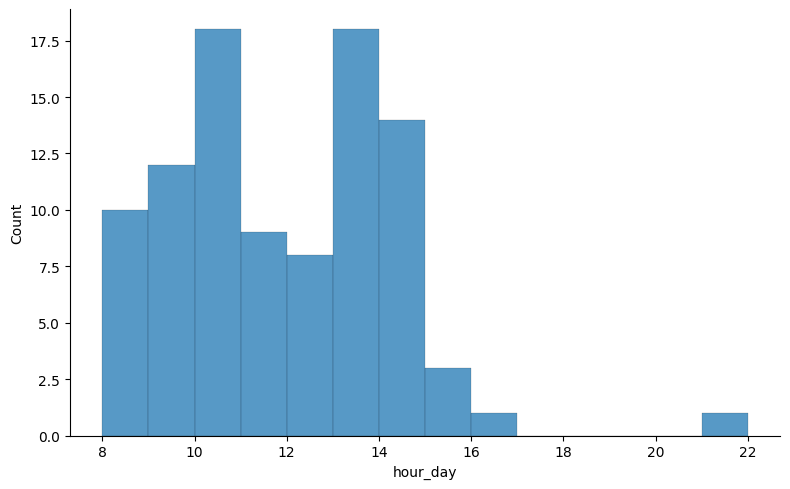

In [19]:
import seaborn as sns
sns.displot(df["hour_day"], bins=range(8,23), aspect=1.6, lw=0.1)

### 4.4 Counting and associations

Next, we can analyze how the variables *rt_count* and *has_media* are related. To do that, we can create a crosstable dividing the formerly continuous variable *rt_count* into the categories *0* and *1 or more*.

- Is there a relationship between having media (images/videos) in the tweet, and the tweet being retweeted more often?
- Is there a relationship between having a url in the tweet, and the tweet being retweeted more often? (for this change `has_media` to `has_url`).

*ANSWERS*

There seems to be a relationship: Tweets with media were retweeted more often than not, for those without media the opposite is the case.

In [8]:
# Association
pd.crosstab(df["rt_count"]>0, df["has_media"])

has_media,False,True
rt_count,,
False,59,3
True,27,8


Finally, let's see if there is a relationship between the hour when the tweet is posted (`hour_day`) and the number of rewtweets (`rt_count`).

Do you see any relationship?

*ANSWERS*

Generally, a positive relationship between the two, but stronger variation for later times.

In [ ]:
import seaborn as sns
sns.regplot(x="hour_day", y="rt_count", data=df.loc[df["rt_count"]>0], lowess=True)

### 4.5 Finally, redo the last plot using the number of likes instead of the number of retweets. (Hint: Use the same code as above, but change `rt_count` to the abbreviation used for likes, `like_count`).

Is there any difference between the hour of the day and the number of likes the tweet reflects?

*ANSWERS*

Similar positive relationship as before, with higher variation at later times of the day

In [ ]:
sns.regplot(x="hour_day", y="like_count", data=df.loc[df["like_count"]>0], lowess=True)

## Part 5 (home): Questions on Paper

Skim through the paper *Social capital I: measurement and associations with economic mobility* (Chetty et al., 2022) (linked [here](https://www.nature.com/articles/s41586-022-04996-4)). You don't have to focus too much on the results and implications of the paper, but rather on the type of data it draws upon.

Reflect on the 8 characteristics of digital trace data that were discussed in the lecture by answering the following questions about the data used in the paper:

- Is it ready made or custom made?
- What is the size?
- Is the data always on?
- Do you think measuring social capital using Facebook data would be accurate for young people? and for old people? Why or why not?
- Is the data drifting?
- Is this data algorithmically confounded?
- Is it sensitive data? What opportunities for harm may be there if the data is leaked?
- Is the data accessible for other researchers?


*ADD YOUR ANSWERS HERE*